In [1]:
%pip install numpy pandas scikit-learn
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df = pd.read_csv('Data\cumulative_2025.10.03_07.59.03.csv')
df

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,9561,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,9562,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,9563,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_rowid          9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2747 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [4]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Fill numerical columns with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode (most frequent value)
for col in cat_cols:
    mode = df[col].mode()
    if not mode.empty:
        df[col] = df[col].fillna(mode[0])
    else:
        df[col] = df[col].fillna('Unknown')

df.head()

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,Kepler-1 b,CANDIDATE,CANDIDATE,0.000,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,Kepler-1 b,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
# Scale all numerical features in df_filtered using StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

df_scaled.head()

c:\Users\Victus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Victus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Victus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,-1.731870,1.170922,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.230109,-0.043758,-0.550774,-0.496109,...,1.144846,0.357629,-0.417346,0.556455,-0.128771,-0.277340,0.151242,-0.026421,1.202764,0.781320
1,-1.731508,1.170922,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,1.159798,-0.043758,-0.550774,-0.496109,...,1.144846,0.357629,-0.417346,0.556455,-0.128771,-0.277340,0.151242,-0.026421,1.202764,0.781320
2,-1.731145,1.176212,K00753.01,Kepler-1 b,CANDIDATE,CANDIDATE,-1.037989,-0.043758,-0.550774,-0.496109,...,-0.195382,0.538807,-0.571192,-0.402565,-0.138587,-0.136383,0.143206,1.037397,1.200675,0.845566
3,-1.730783,1.190143,K00754.01,Kepler-1 b,FALSE POSITIVE,FALSE POSITIVE,-1.037989,-0.043758,1.815626,-0.496109,...,-0.167166,0.585866,-0.501961,-0.306663,-0.151396,-0.171622,0.148406,-1.369071,1.242630,0.961786
4,-1.730421,1.192441,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.230109,-0.043758,-0.550774,-0.496109,...,-0.689150,0.289393,-0.371192,-0.810148,-0.108975,-0.025159,0.117204,-0.693454,1.226243,0.898262


In [6]:
# Show number of unique values in each categorical feature of df_scaled
cat_cols = df_scaled.select_dtypes(include=['object', 'category', 'bool']).columns
unique_counts = df_scaled[cat_cols].nunique()
print(unique_counts)

kepoi_name           9564
kepler_name          2747
koi_disposition         3
koi_pdisposition        2
koi_tce_delivname       3
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns in df_scaled
cat_cols = df_scaled.select_dtypes(include=['object', 'category', 'bool']).columns

# Apply label encoding to each categorical column
df_scaled_label_encoded = df_scaled.copy()
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    # Fill NaN with a placeholder string before encoding
    df_scaled_label_encoded[col] = le.fit_transform(df_scaled_label_encoded[col].fillna('NaN_Label'))
    le_dict[col] = le  # Save encoder if inverse_transform is needed later

df_scaled_label_encoded.head()

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,-1.731870,1.170922,1080,1435,1,0,1.230109,-0.043758,-0.550774,-0.496109,...,1.144846,0.357629,-0.417346,0.556455,-0.128771,-0.277340,0.151242,-0.026421,1.202764,0.781320
1,-1.731508,1.170922,1081,1436,1,0,1.159798,-0.043758,-0.550774,-0.496109,...,1.144846,0.357629,-0.417346,0.556455,-0.128771,-0.277340,0.151242,-0.026421,1.202764,0.781320
2,-1.731145,1.176212,1082,0,0,0,-1.037989,-0.043758,-0.550774,-0.496109,...,-0.195382,0.538807,-0.571192,-0.402565,-0.138587,-0.136383,0.143206,1.037397,1.200675,0.845566
3,-1.730783,1.190143,1083,0,2,1,-1.037989,-0.043758,1.815626,-0.496109,...,-0.167166,0.585866,-0.501961,-0.306663,-0.151396,-0.171622,0.148406,-1.369071,1.242630,0.961786
4,-1.730421,1.192441,1084,2304,1,0,1.230109,-0.043758,-0.550774,-0.496109,...,-0.689150,0.289393,-0.371192,-0.810148,-0.108975,-0.025159,0.117204,-0.693454,1.226243,0.898262


In [8]:
df_scaled_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_rowid          9564 non-null   float64
 1   kepid              9564 non-null   float64
 2   kepoi_name         9564 non-null   int32  
 3   kepler_name        9564 non-null   int32  
 4   koi_disposition    9564 non-null   int32  
 5   koi_pdisposition   9564 non-null   int32  
 6   koi_score          9564 non-null   float64
 7   koi_fpflag_nt      9564 non-null   float64
 8   koi_fpflag_ss      9564 non-null   float64
 9   koi_fpflag_co      9564 non-null   float64
 10  koi_fpflag_ec      9564 non-null   float64
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9564 non-null   float64
 13  koi_period_err2    9564 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9564 non-null   float64
 16  koi_time0bk_err2   9564 

In [9]:
# Calculate correlations with "koi_disposition"
corr_with_disposition = df_scaled_label_encoded.corr(numeric_only=True)["koi_disposition"].drop("koi_disposition")
corr_with_disposition = corr_with_disposition.abs()  # Use absolute values for correlation strength
# Sort correlations in descending order
corr_with_disposition_sorted = corr_with_disposition.sort_values(ascending=False)
print(corr_with_disposition_sorted)

koi_pdisposition     0.897517
koi_score            0.649201
koi_fpflag_ss        0.483310
koi_fpflag_co        0.440421
koi_fpflag_ec        0.327875
koi_teq              0.267294
koi_depth            0.238392
koi_steff_err1       0.229582
koi_model_snr        0.228149
koi_steff_err2       0.208465
kepler_name          0.197702
koi_tce_plnt_num     0.165962
loc_rowid            0.159110
kepoi_name           0.151129
koi_steff            0.128393
koi_tce_delivname    0.118851
ra                   0.107357
koi_duration         0.105695
dec                  0.089929
koi_slogg_err1       0.089239
kepid                0.087095
koi_slogg            0.083729
koi_impact_err1      0.083368
koi_slogg_err2       0.081765
koi_srad_err1        0.068325
koi_time0bk          0.062639
koi_time0bk_err2     0.058619
koi_time0bk_err1     0.058619
koi_srad_err2        0.053184
koi_insol_err1       0.050042
koi_srad             0.047429
koi_impact           0.044601
koi_kepmag           0.043462
koi_insol 

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target
X = df_scaled_label_encoded.drop(columns=["koi_disposition"])
y = df_scaled_label_encoded["koi_disposition"]

# Handle categorical variables if any
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
print(importances_sorted)

koi_pdisposition     0.252135
kepler_name          0.244195
koi_score            0.100015
kepoi_name           0.044565
koi_fpflag_nt        0.040763
loc_rowid            0.039976
koi_fpflag_co        0.033459
koi_fpflag_ss        0.031078
koi_prad             0.026980
koi_model_snr        0.019555
koi_prad_err2        0.015630
koi_steff_err1       0.013301
koi_prad_err1        0.011360
koi_duration_err2    0.010180
koi_fpflag_ec        0.010177
koi_duration_err1    0.009468
koi_period_err1      0.007514
koi_depth            0.007147
koi_period_err2      0.007044
koi_time0bk_err1     0.007026
koi_insol_err1       0.005157
koi_steff_err2       0.005019
koi_period           0.004986
koi_insol            0.004637
koi_tce_delivname    0.004577
koi_srad_err1        0.004082
koi_teq              0.003825
koi_impact           0.003465
koi_duration         0.003064
koi_depth_err2       0.002807
koi_time0bk_err2     0.002539
koi_depth_err1       0.002384
koi_insol_err2       0.002335
koi_slogg_

In [11]:
# Select top N features from both correlation and feature importance
N = 20

# Get top N features by absolute correlation with disposition
top_corr_features = corr_with_disposition_sorted.head(N).index.tolist()

# Get top N features by Random Forest importance (excluding one-hot columns for clarity)
top_importance_features = importances_sorted.head(N).index.tolist()

# Combine and deduplicate
selected_features = list(set(top_corr_features + top_importance_features))

# Filter X_train to only these features
valuable_features_df = X_train[selected_features]

print("Selected features:", selected_features)
valuable_features_df.head()

Selected features: ['koi_model_snr', 'dec', 'koi_time0bk_err1', 'koi_period_err1', 'koi_prad_err1', 'koi_steff_err1', 'loc_rowid', 'koi_fpflag_co', 'kepoi_name', 'koi_period_err2', 'koi_duration_err1', 'koi_steff', 'koi_prad', 'koi_duration', 'koi_depth', 'koi_tce_plnt_num', 'koi_fpflag_ss', 'koi_fpflag_nt', 'koi_prad_err2', 'ra', 'koi_score', 'koi_duration_err2', 'koi_teq', 'koi_fpflag_ec', 'koi_steff_err2', 'koi_tce_delivname', 'kepler_name', 'koi_slogg_err1', 'koi_pdisposition']


,koi_model_snr,dec,koi_time0bk_err1,koi_period_err1,koi_prad_err1,koi_steff_err1,loc_rowid,koi_fpflag_co,kepoi_name,koi_period_err2,...,ra,koi_score,koi_duration_err2,koi_teq,koi_fpflag_ec,koi_steff_err2,koi_tce_delivname,kepler_name,koi_slogg_err1,koi_pdisposition
1385,-0.277432,0.498489,-0.266981,-0.244849,-0.043028,-1.484731,-1.230220,-0.496109,2705,0.244849,...,1.753385,1.230109,0.318366,-0.413299,-0.369333,1.074308,2,1054,-0.294270,0
654,0.710638,0.366676,-0.421577,-0.254111,-0.033123,0.473426,-1.494989,-0.496109,138,0.254111,...,0.493514,-1.037989,0.487055,-0.110027,-0.369333,-0.858442,2,0,0.267268,1
1201,-0.300838,-1.067027,-0.073848,-0.208193,-0.043080,0.321125,-1.296865,-0.496109,2302,0.208193,...,-0.381657,1.196087,0.045104,-0.642833,-0.369333,-0.223597,2,0,-0.586577,0
7467,0.096180,-0.038076,-0.416261,-0.253991,0.018931,1.757106,0.972694,-0.496109,7262,0.253991,...,1.417484,-1.037989,0.476674,0.663017,-0.369333,-2.325639,2,0,1.513419,1
6117,-0.291501,-0.879033,-0.244833,-0.249965,-0.042976,0.255853,0.483721,-0.496109,6368,0.249965,...,-1.893217,-0.280445,0.287834,-0.237282,-0.369333,0.030341,0,0,-0.371192,1


In [12]:
valuable_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7173 entries, 1385 to 7270
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_model_snr      7173 non-null   float64
 1   dec                7173 non-null   float64
 2   koi_time0bk_err1   7173 non-null   float64
 3   koi_period_err1    7173 non-null   float64
 4   koi_prad_err1      7173 non-null   float64
 5   koi_steff_err1     7173 non-null   float64
 6   loc_rowid          7173 non-null   float64
 7   koi_fpflag_co      7173 non-null   float64
 8   kepoi_name         7173 non-null   int32  
 9   koi_period_err2    7173 non-null   float64
 10  koi_duration_err1  7173 non-null   float64
 11  koi_steff          7173 non-null   float64
 12  koi_prad           7173 non-null   float64
 13  koi_duration       7173 non-null   float64
 14  koi_depth          7173 non-null   float64
 15  koi_tce_plnt_num   7173 non-null   float64
 16  koi_fpflag_ss      7173 no

In [13]:
# Remove 'koi_pdisposition' from valuable_features_df if present
if 'koi_pdisposition' in valuable_features_df.columns:
    valuable_features_df = valuable_features_df.drop(columns=['koi_pdisposition'])

valuable_features_df.head()

,koi_model_snr,dec,koi_time0bk_err1,koi_period_err1,koi_prad_err1,koi_steff_err1,loc_rowid,koi_fpflag_co,kepoi_name,koi_period_err2,...,koi_prad_err2,ra,koi_score,koi_duration_err2,koi_teq,koi_fpflag_ec,koi_steff_err2,koi_tce_delivname,kepler_name,koi_slogg_err1
1385,-0.277432,0.498489,-0.266981,-0.244849,-0.043028,-1.484731,-1.230220,-0.496109,2705,0.244849,...,0.026902,1.753385,1.230109,0.318366,-0.413299,-0.369333,1.074308,2,1054,-0.294270
654,0.710638,0.366676,-0.421577,-0.254111,-0.033123,0.473426,-1.494989,-0.496109,138,0.254111,...,0.025014,0.493514,-1.037989,0.487055,-0.110027,-0.369333,-0.858442,2,0,0.267268
1201,-0.300838,-1.067027,-0.073848,-0.208193,-0.043080,0.321125,-1.296865,-0.496109,2302,0.208193,...,0.027004,-0.381657,1.196087,0.045104,-0.642833,-0.369333,-0.223597,2,0,-0.586577
7467,0.096180,-0.038076,-0.416261,-0.253991,0.018931,1.757106,0.972694,-0.496109,7262,0.253991,...,-0.014265,1.417484,-1.037989,0.476674,0.663017,-0.369333,-2.325639,2,0,1.513419
6117,-0.291501,-0.879033,-0.244833,-0.249965,-0.042976,0.255853,0.483721,-0.496109,6368,0.249965,...,0.026893,-1.893217,-0.280445,0.287834,-0.237282,-0.369333,0.030341,0,0,-0.371192


In [14]:
# Add the target variable (koi_disposition) to valuable_features_df
preprocessed_df = valuable_features_df.copy()
preprocessed_df["koi_disposition"] = df_scaled_label_encoded.loc[valuable_features_df.index, "koi_disposition"]

preprocessed_df.head()

,koi_model_snr,dec,koi_time0bk_err1,koi_period_err1,koi_prad_err1,koi_steff_err1,loc_rowid,koi_fpflag_co,kepoi_name,koi_period_err2,...,ra,koi_score,koi_duration_err2,koi_teq,koi_fpflag_ec,koi_steff_err2,koi_tce_delivname,kepler_name,koi_slogg_err1,koi_disposition
1385,-0.277432,0.498489,-0.266981,-0.244849,-0.043028,-1.484731,-1.230220,-0.496109,2705,0.244849,...,1.753385,1.230109,0.318366,-0.413299,-0.369333,1.074308,2,1054,-0.294270,1
654,0.710638,0.366676,-0.421577,-0.254111,-0.033123,0.473426,-1.494989,-0.496109,138,0.254111,...,0.493514,-1.037989,0.487055,-0.110027,-0.369333,-0.858442,2,0,0.267268,2
1201,-0.300838,-1.067027,-0.073848,-0.208193,-0.043080,0.321125,-1.296865,-0.496109,2302,0.208193,...,-0.381657,1.196087,0.045104,-0.642833,-0.369333,-0.223597,2,0,-0.586577,0
7467,0.096180,-0.038076,-0.416261,-0.253991,0.018931,1.757106,0.972694,-0.496109,7262,0.253991,...,1.417484,-1.037989,0.476674,0.663017,-0.369333,-2.325639,2,0,1.513419,2
6117,-0.291501,-0.879033,-0.244833,-0.249965,-0.042976,0.255853,0.483721,-0.496109,6368,0.249965,...,-1.893217,-0.280445,0.287834,-0.237282,-0.369333,0.030341,0,0,-0.371192,2


In [15]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7173 entries, 1385 to 7270
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_model_snr      7173 non-null   float64
 1   dec                7173 non-null   float64
 2   koi_time0bk_err1   7173 non-null   float64
 3   koi_period_err1    7173 non-null   float64
 4   koi_prad_err1      7173 non-null   float64
 5   koi_steff_err1     7173 non-null   float64
 6   loc_rowid          7173 non-null   float64
 7   koi_fpflag_co      7173 non-null   float64
 8   kepoi_name         7173 non-null   int32  
 9   koi_period_err2    7173 non-null   float64
 10  koi_duration_err1  7173 non-null   float64
 11  koi_steff          7173 non-null   float64
 12  koi_prad           7173 non-null   float64
 13  koi_duration       7173 non-null   float64
 14  koi_depth          7173 non-null   float64
 15  koi_tce_plnt_num   7173 non-null   float64
 16  koi_fpflag_ss      7173 no

In [16]:
# Calculate percentage of outliers in each numerical column using IQR bounds

Q1 = preprocessed_df.quantile(0.25)
Q3 = preprocessed_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_percent = ((preprocessed_df < lower_bound) | (preprocessed_df > upper_bound)).sum() / len(df) * 100
outlier_percent = outlier_percent.sort_values(ascending=False)
print(outlier_percent)

koi_fpflag_ss        17.670431
koi_fpflag_co        14.627771
kepler_name          14.491844
koi_depth            14.429109
koi_prad_err1        14.303639
koi_period_err1      13.467169
koi_period_err2      13.467169
koi_model_snr        13.038478
koi_prad             12.913007
koi_fpflag_nt        12.202008
koi_prad_err2        11.804684
koi_tce_plnt_num     11.741949
koi_tce_delivname     9.274362
koi_fpflag_ec         8.678377
koi_duration_err1     8.197407
koi_duration_err2     8.197407
koi_time0bk_err1      7.214555
koi_duration          6.869511
koi_slogg_err1        6.252614
koi_steff             4.694688
koi_teq               3.387704
koi_steff_err2        1.819322
koi_steff_err1        0.585529
kepoi_name            0.000000
koi_score             0.000000
ra                    0.000000
loc_rowid             0.000000
dec                   0.000000
koi_disposition       0.000000
dtype: float64


In [17]:
# Calculate outlier mask for each numerical column
outlier_mask = ((preprocessed_df < lower_bound) | (preprocessed_df > upper_bound)).astype(int)

# Encode target variable (koi_disposition) as numeric
target_encoded = preprocessed_df["koi_disposition"]

# Compute correlation between outlier presence and target
outlier_target_corr = outlier_mask.corrwith(target_encoded).sort_values(ascending=False)
print(outlier_target_corr)

koi_fpflag_ss        0.486153
koi_fpflag_co        0.434729
koi_fpflag_nt        0.387867
koi_prad_err1        0.376487
koi_prad             0.365277
koi_prad_err2        0.319513
koi_fpflag_ec        0.319477
koi_depth            0.302666
koi_model_snr        0.298210
koi_teq              0.170789
koi_slogg_err1       0.108239
koi_duration         0.086586
koi_steff_err2       0.086344
koi_steff            0.028063
koi_steff_err1       0.022046
koi_duration_err1    0.008796
koi_duration_err2    0.008796
koi_time0bk_err1    -0.015541
koi_tce_delivname   -0.109025
koi_period_err2     -0.133148
koi_period_err1     -0.133148
kepler_name         -0.188064
koi_tce_plnt_num    -0.190213
dec                       NaN
loc_rowid                 NaN
kepoi_name                NaN
ra                        NaN
koi_score                 NaN
koi_disposition           NaN
dtype: float64


c:\Users\Victus\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Victus\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Figure size 1200x600 with 0 Axes>

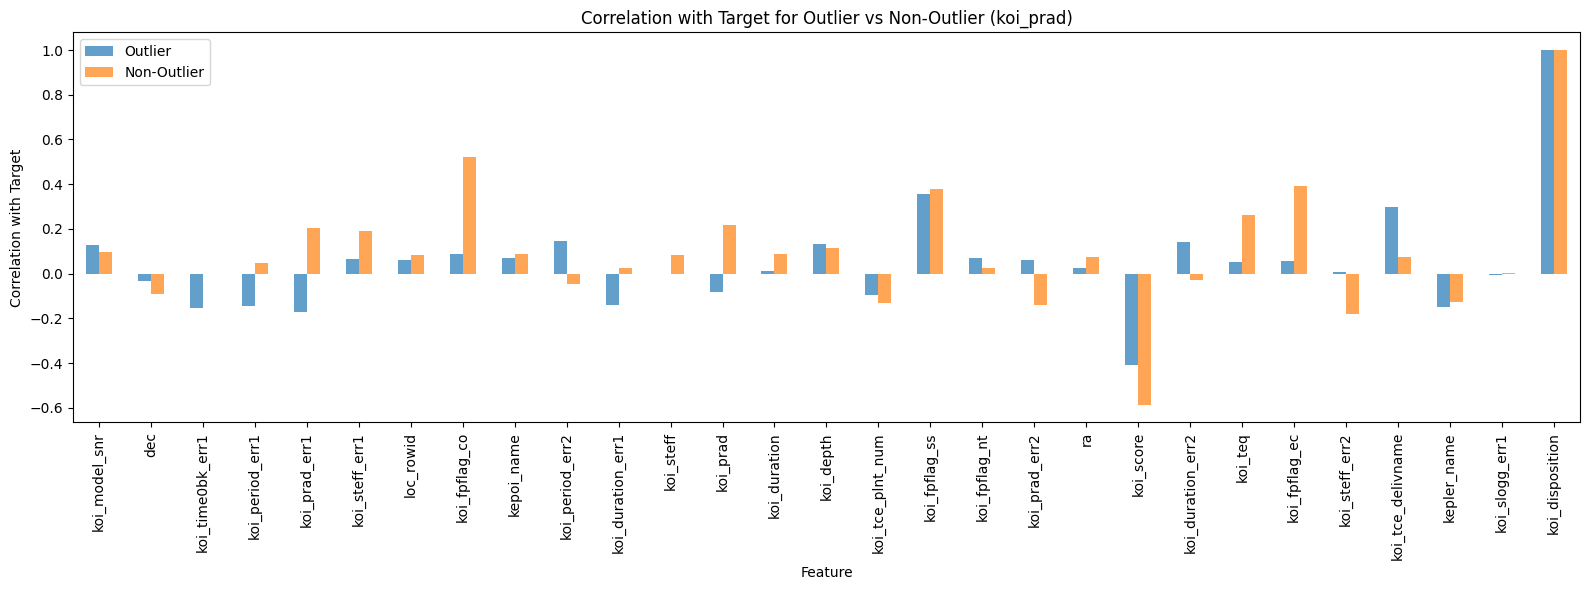

In [18]:
import matplotlib.pyplot as plt

# Choose a numerical column to illustrate (e.g., koi_prad)
feature = "koi_prad"

# Boolean masks for outliers and non-outliers in the selected feature
is_outlier = outlier_mask[feature] == 1
not_outlier = outlier_mask[feature] == 0

# Compute correlation of all numerical features with target for outliers and non-outliers
corr_outlier = preprocessed_df[is_outlier].corrwith(target_encoded[is_outlier])
corr_non_outlier = preprocessed_df[not_outlier].corrwith(target_encoded[not_outlier])

# Combine into a DataFrame for easy plotting
corr_df = pd.DataFrame({
    "Outlier": corr_outlier,
    "Non-Outlier": corr_non_outlier
}).dropna()

# Plot
plt.figure(figsize=(12, 6))
corr_df.plot(kind="bar", alpha=0.7, figsize=(16, 6))
plt.title(f"Correlation with Target for Outlier vs Non-Outlier ({feature})")
plt.ylabel("Correlation with Target")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

In [19]:
# Show class balance for the target variable in the full dataset
print("Class distribution in full dataset:")
print(y.value_counts())

# Show class balance for the training set
print("\nClass distribution in training set:")
print(y_train.value_counts())

# Show class balance for the test set
print("\nClass distribution in test set:")
print(y_test.value_counts())

Class distribution in full dataset:
koi_disposition
2    4839
1    2746
0    1979
Name: count, dtype: int64

Class distribution in training set:
koi_disposition
2    3649
1    2057
0    1467
Name: count, dtype: int64

Class distribution in test set:
koi_disposition
2    1190
1     689
0     512
Name: count, dtype: int64


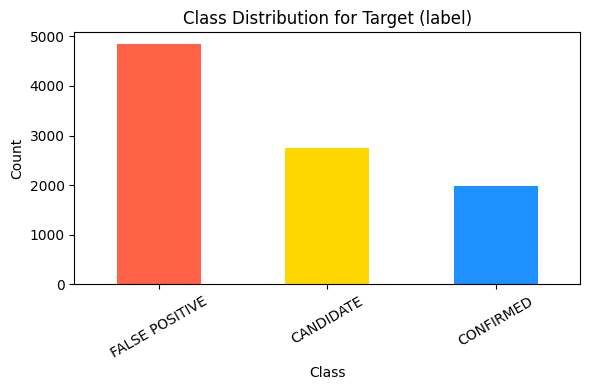

In [20]:
import matplotlib.pyplot as plt

# Visualize class distribution for the target column "label"
plt.figure(figsize=(6,4))
y.value_counts().plot(kind='bar', color=['tomato', 'gold', 'dodgerblue'])
plt.xticks(ticks=[0,1,2], labels=["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"], rotation=30)
plt.title("Class Distribution for Target (label)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [21]:
from sklearn.utils import resample

# Concatenate features and target for downsampling
df_downsample = preprocessed_df.copy()

# Separate majority and minority classes
class_counts = df_downsample["koi_disposition"].value_counts()
min_class = class_counts.idxmin()
min_count = class_counts.min()

# Downsample each class to the size of the smallest class
dfs = []
for cls in class_counts.index:
    cls_df = df_downsample[df_downsample["koi_disposition"] == cls]
    cls_downsampled = resample(cls_df, replace=False, n_samples=min_count, random_state=42)
    dfs.append(cls_downsampled)

df_downsampled = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)
print(df_downsampled["koi_disposition"].value_counts())
df_downsampled.head()

koi_disposition
2    1467
0    1467
1    1467
Name: count, dtype: int64


,koi_model_snr,dec,koi_time0bk_err1,koi_period_err1,koi_prad_err1,koi_steff_err1,loc_rowid,koi_fpflag_co,kepoi_name,koi_period_err2,...,ra,koi_score,koi_duration_err2,koi_teq,koi_fpflag_ec,koi_steff_err2,koi_tce_delivname,kepler_name,koi_slogg_err1,koi_disposition
0,-0.100027,1.311110,-0.419628,-0.254320,-0.024000,0.603970,1.506218,2.015688,8680,0.254320,...,-0.242183,-1.037989,0.494352,1.422979,-0.369333,-0.689150,2,0,-0.286577,2
1,-0.235862,-1.052081,-0.336084,-0.193597,-0.039640,-1.419459,-1.298676,-0.496109,2197,0.193597,...,-0.405251,1.230109,0.264935,-0.861664,-0.369333,1.384676,2,0,1.244189,0
2,-0.299048,-0.754610,0.024048,-0.215186,-0.042507,1.060873,-0.874537,-0.496109,3927,0.215186,...,-0.318918,1.202892,0.158073,-0.479899,-0.369333,-1.366318,2,0,-0.409654,0
3,-0.276792,0.989009,-0.293116,-0.254055,-0.024912,0.690999,-0.824553,2.015688,3782,0.254055,...,0.101678,-1.037989,0.164179,1.596617,2.707584,-0.830226,2,0,-0.509654,2
4,-0.254665,0.810673,-0.291345,-0.205758,-0.042820,0.299368,0.331234,-0.496109,2534,0.205758,...,-0.459577,1.230109,0.353478,-0.896154,-0.369333,0.044449,2,2720,-0.640423,1


In [22]:
# Split df_downsampled into features (X) and target (y)
X_downsampled = df_downsampled.drop(columns=["koi_disposition"])
y_downsampled = df_downsampled["koi_disposition"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_downsampled, y_downsampled, test_size=0.2, random_state=42, stratify=y_downsampled
)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Print accuracy
print("Test accuracy:", accuracy_score(y_test, y_pred))


Test accuracy: 0.9886492622020431


In [24]:
# import numpy as np
# # Define a threshold for "significantly far" correlation difference
# corr_diff_threshold = 0.2

# # Calculate absolute difference between outlier and non-outlier correlation for each feature
# corr_diff = (corr_df["Outlier"] - corr_df["Non-Outlier"]).abs()

# # Select features where the difference exceeds the threshold
# features_to_filter = corr_diff[corr_diff > corr_diff_threshold].index.tolist()
# print("Features to filter outliers from:", features_to_filter)

# # Remove outliers for these features (set outlier rows to NaN for those features)
# df_filtered = df.copy()
# for feature in features_to_filter:
#     df_filtered.loc[outlier_mask[feature] == 1, feature] = np.nan

# df_filtered.head()

In [25]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assume you have these (replace with your actual data)
# X_train: np.array or torch.Tensor, shape [n_samples, input_size]
# y_train: np.array or torch.Tensor, shape [n_samples], values 0-2
# X_test, y_test: similar

# Convert to tensors if not already
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Data loaders
batch_size = 32  # Adjust based on your data size and memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Compute class weights for imbalance (optional but recommended for recall)
class_counts = np.bincount(y_train.numpy())
class_weights = 1. / class_counts
class_weights = torch.tensor(class_weights / class_weights.sum(), dtype=torch.float32)  # Normalize

In [26]:
X_train.shape

torch.Size([3520, 28])

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features, dropout_rate=0.3):  # <-- fixed __init__
        super(ResidualBlock, self).__init__()  # <-- fixed __init__
        self.fc = nn.Linear(in_features, out_features)
        self.ln = nn.LayerNorm(out_features)  # Layer norm for better stability
        self.dropout = nn.Dropout(dropout_rate)
        
        # Projection if dimensions differ
        self.proj = nn.Linear(in_features, out_features) if in_features != out_features else nn.Identity()
    
    def forward(self, x):
        residual = self.proj(x)
        x = F.silu(self.ln(self.fc(x)))  # Swish activation
        x = self.dropout(x)
        return x + residual  # Skip connection


class ResidualMLP(nn.Module):
    def __init__(self, input_size=16, num_classes=3):  # <-- fixed __init__
        super(ResidualMLP, self).__init__()  # <-- fixed __init__
        self.entry = nn.Linear(input_size, 256)  # Entry layer
        
        # Residual blocks for depth
        self.res_block1 = ResidualBlock(256, 256)
        self.res_block2 = ResidualBlock(256, 128)
        self.res_block3 = ResidualBlock(128, 128)
        self.res_block4 = ResidualBlock(128, 64)
        
        self.dropout_final = nn.Dropout(0.2)
        self.fc_out = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = F.silu(self.entry(x))
        
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        x = self.res_block4(x)
        
        x = self.dropout_final(x)
        x = self.fc_out(x)  # Logits output
        return x


In [28]:
classes = np.unique(y_train)  # unique class labels
print("Classes:", classes)

Classes: [0 1 2]


In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Ensure y_train is numpy
if isinstance(y_train, torch.Tensor):
    y_train_np = y_train.cpu().numpy()
else:
    y_train_np = np.array(y_train)

# Get unique classes
classes = np.unique(y_train_np)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_np
)

# Convert to tensor for PyTorch
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

print("Classes:", classes)
print("Class Weights:", class_weights)


# ---- Focal Loss with class weights ----
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha  # can be class weights tensor
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)  # probability of true class
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        return focal_loss


# ---- Initialize with class weights ----
loss_fn = FocalLoss(alpha=class_weights, gamma=2.0)


Classes: [0 1 2]
Class Weights: tensor([0.9994, 1.0003, 1.0003], device='cuda:0')


In [30]:
print("CUDA Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Number of GPUs:", torch.cuda.device_count())
    print("Current Device Index:", torch.cuda.current_device())

CUDA Available: True
GPU Name: NVIDIA GeForce RTX 4070 Laptop GPU
Number of GPUs: 1
Current Device Index: 0


In [31]:
import torch
import torch.nn as nn
import numpy as np

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model
input_size = X_train.shape[1]  # number of features
model = ResidualMLP(input_size=input_size, num_classes=3).to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.005, weight_decay=1e-5)

# Learning rate scheduler (ReduceLROnPlateau equivalent)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.8, patience=6, min_lr=1e-6
)

# Early stopping setup
patience = 20
best_accuracy = 0.0
epochs_no_improve = 0
best_model_path = "best_residual_mlp_model.pth"

# Training loop
epochs = 300
for epoch in range(epochs):
    # --- Training ---
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        
        loss = loss_fn(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
    
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = 100 * correct / total

    # --- Evaluation on test set ---
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = loss_fn(outputs, batch_y)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_test += batch_y.size(0)
            correct_test += (predicted == batch_y).sum().item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test

    # --- Scheduler step ---
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(test_accuracy)
    new_lr = optimizer.param_groups[0]['lr']
    if new_lr < old_lr:
        print(f"📉 Learning rate reduced from {old_lr:.6f} to {new_lr:.6f}")

    # --- Save best model ---
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Saved new best model at epoch {epoch+1} with Test Accuracy: {best_accuracy:.2f}%")
        epochs_no_improve = 0  # reset patience counter
    else:
        epochs_no_improve += 1

    # --- Logging ---
    print(
        f"Epoch {epoch+1}/{epochs} | "
        f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
        f"Test Loss: {avg_test_loss:.4f}, Test Acc: {test_accuracy:.2f}%"
    )


print(f"\n🎯 Training finished. Best Test Accuracy: {best_accuracy:.2f}%")


✅ Saved new best model at epoch 1 with Test Accuracy: 66.63%
Epoch 1/300 | Train Loss: 29.4357, Train Acc: 63.61% | Test Loss: 0.1301, Test Acc: 66.63%
✅ Saved new best model at epoch 2 with Test Accuracy: 69.81%
Epoch 2/300 | Train Loss: 0.6532, Train Acc: 68.75% | Test Loss: 0.1237, Test Acc: 69.81%
Epoch 3/300 | Train Loss: 0.4254, Train Acc: 69.94% | Test Loss: 0.1235, Test Acc: 69.69%
✅ Saved new best model at epoch 4 with Test Accuracy: 75.60%
Epoch 4/300 | Train Loss: 0.3355, Train Acc: 73.07% | Test Loss: 0.1016, Test Acc: 75.60%
✅ Saved new best model at epoch 5 with Test Accuracy: 81.50%
Epoch 5/300 | Train Loss: 0.2168, Train Acc: 76.70% | Test Loss: 0.0978, Test Acc: 81.50%
Epoch 6/300 | Train Loss: 0.1559, Train Acc: 81.79% | Test Loss: 0.1429, Test Acc: 70.37%
✅ Saved new best model at epoch 7 with Test Accuracy: 91.71%
Epoch 7/300 | Train Loss: 0.1963, Train Acc: 81.51% | Test Loss: 0.0603, Test Acc: 91.71%
Epoch 8/300 | Train Loss: 0.1765, Train Acc: 82.78% | Test Loss:

In [32]:
from sklearn.metrics import classification_report

# --- Evaluate on test set and generate classification report ---
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Generate report
print("\n📊 Classification Report:")
print(classification_report(all_labels, all_preds, digits=4))



📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9898    0.9932    0.9915       293
           1     1.0000    0.9966    0.9983       294
           2     0.9898    0.9898    0.9898       294

    accuracy                         0.9932       881
   macro avg     0.9932    0.9932    0.9932       881
weighted avg     0.9932    0.9932    0.9932       881



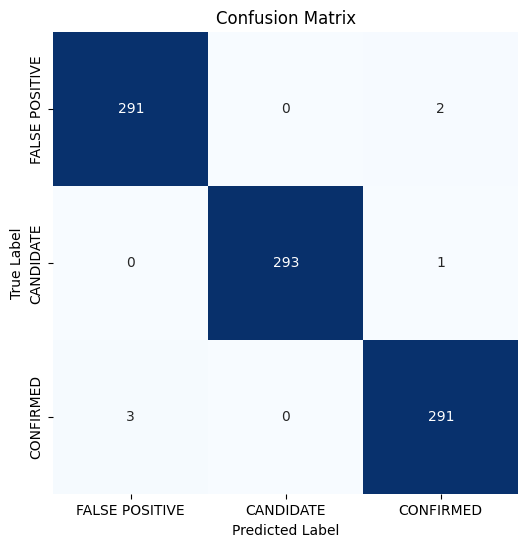

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reverse map: from int → label
label_map = {"FALSE POSITIVE": 0, "CANDIDATE": 1, "CONFIRMED": 2}
inv_label_map = {v: k for k, v in label_map.items()}

# Put model in eval mode and collect predictions
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Create readable labels
labels = [inv_label_map[i] for i in sorted(inv_label_map.keys())]

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
